In [1]:
import pennylane as qml
from pennylane import numpy as np
from matplotlib import pyplot as plt
import time
from supplementary_code import *

In [2]:
nq = 10
depth = int(nq/2)
dev = qml.device("default.qubit", wires= nq) 

In [3]:
Delta = 1.0
H = H_XXZ(Delta,wires=range(nq))

print(H)

  (1) [X0 X1]
+ (1) [Y0 Y1]
+ (1.0) [Z0 Z1]
+ (1) [X1 X2]
+ (1) [Y1 Y2]
+ (1.0) [Z1 Z2]
+ (1) [X2 X3]
+ (1) [Y2 Y3]
+ (1.0) [Z2 Z3]
+ (1) [X3 X4]
+ (1) [Y3 Y4]
+ (1.0) [Z3 Z4]
+ (1) [X4 X5]
+ (1) [Y4 Y5]
+ (1.0) [Z4 Z5]
+ (1) [X5 X6]
+ (1) [Y5 Y6]
+ (1.0) [Z5 Z6]
+ (1) [X6 X7]
+ (1) [Y6 Y7]
+ (1.0) [Z6 Z7]
+ (1) [X7 X8]
+ (1) [Y7 Y8]
+ (1.0) [Z7 Z8]
+ (1) [X8 X9]
+ (1) [Y8 Y9]
+ (1.0) [Z8 Z9]
+ (1) [X9 X0]
+ (1) [Y9 Y0]
+ (1.0) [Z9 Z0]


In [4]:
params = np.array([np.pi for _ in range(4*depth)])

In [5]:
@qml.qnode(dev)
def circuit(params, Delta, depth=depth, nq=nq):
    
    HVA_ansatz(params, Delta, depth, range(nq))
    
    return qml.expval(H)

In [6]:
cost_fn = lambda w: circuit(w, Delta=Delta, depth=depth, nq=nq)

In [7]:
start_time = time.time()    

steps = 200

optimizer = qml.AdamOptimizer(stepsize=0.5)
best_cost = cost_fn(params)
best_params = params

for j in range(steps+1):
    params2 = params
    params, cost = optimizer.step_and_cost(cost_fn, params)

    if cost < best_cost:
        best_params = params2
        best_cost = cost
        
    if j!=0 and j % 2 == 0:
        print(f"Cost at Step {j}: {cost}")

end_time = time.time()
print('Time taken: ', (end_time-start_time)/60, ' mins.')

Cost at Step 2: -8.269862316481365
Cost at Step 4: -4.401939204792133
Cost at Step 6: -3.6425504242794395
Cost at Step 8: -2.9504391875847045
Cost at Step 10: -9.13735018837222
Cost at Step 12: -11.663438684496462
Cost at Step 14: -11.206953359797948
Cost at Step 16: -14.869926088553154
Cost at Step 18: -15.160505588233217
Cost at Step 20: -16.320337207464387
Cost at Step 22: -15.854883065451833
Cost at Step 24: -16.534475917173836
Cost at Step 26: -16.20206744596623
Cost at Step 28: -16.860637869968432
Cost at Step 30: -16.900280530900574
Cost at Step 32: -17.132619131545976
Cost at Step 34: -17.06400990351912
Cost at Step 36: -17.153026220153066
Cost at Step 38: -17.205836220294568
Cost at Step 40: -17.42416270828381
Cost at Step 42: -17.453509008645806
Cost at Step 44: -17.46536578858119
Cost at Step 46: -17.509153042155262
Cost at Step 48: -17.5739952087302
Cost at Step 50: -17.548041122694702
Cost at Step 52: -17.646680523042363
Cost at Step 54: -17.638486055243888
Cost at Step 56

In [8]:
print(best_cost)

-17.907408108738277


In [9]:
print(cost_fn(best_params))

-17.907408108738277


In [10]:
print(np.array(best_params))

[5.43343117 5.63487601 2.88866014 2.93114534 2.49453081 2.56768388
 3.19973649 3.23799654 1.97939938 1.7029967  2.96169648 2.95308626
 2.37670868 2.39771125 2.31808501 2.32021458 2.77743722 2.75394168
 2.62493976 2.57934117]


In [11]:
for i in range(1,10):
    
    corr = corr_function(i, best_params,Delta,depth, nq)
    
    print(i,np.abs(corr))

1 0.686194225024288
2 0.23577782092831376
3 0.24233172352653773
4 0.13720044512402632
5 0.1508474152250665
6 0.13720044512402632
7 0.17171232950686008
8 0.23577782092831387
9 0.49487083882192723


In [12]:
# Time evolution

corr_t = []
t = []
i =  3
dt = 1/400

start_time = time.time()    
for step in range(401):
    
    t.append(dt*step)
    
    corr_dt = corr_function(i, best_params, Delta, depth, nq, perturbation='hamiltonian',timesteps=step)
    
    print(step,corr_dt)
    corr_t.append(corr_dt)
    
end_time = time.time()
print('Time taken: ', (end_time-start_time)/60, ' mins.')

0 -0.24233172352653773
1 -0.2423077144333415
2 -0.24227312935218653
3 -0.24222797400390927
4 -0.2421722556421597
5 -0.24210598305281195
6 -0.24202916655308943
7 -0.24194181799041092
8 -0.24184395074095058
9 -0.24173557970791792
10 -0.24161672131955145
11 -0.24148739352683113
12 -0.2413476158009037
13 -0.24119740913023036
14 -0.24103679601744363
15 -0.24086580047592526
16 -0.24068444802609812
17 -0.24049276569143624
18 -0.24029078199419004
19 -0.24007852695083032
20 -0.23985603206720793
21 -0.239623330333433
22 -0.23938045621847007
23 -0.2391274456644541
24 -0.23886433608072688
25 -0.23859116633758884
26 -0.23830797675977633
27 -0.23801480911965806
28 -0.2377117066301551
29 -0.23739871393738213
30 -0.23707587711301542
31 -0.2367432436463839
32 -0.23640086243628722
33 -0.23604878378254232
34 -0.2356870593772566
35 -0.23531574229583274
36 -0.23493488698770223
37 -0.2345445492667948
38 -0.23414478630174104
39 -0.23373565660580642
40 -0.2333172200265695
41 -0.2328895377353323
42 -0.23245267

336 -0.07543948520231233
337 -0.07549853261166081
338 -0.07556008700206693
339 -0.0756240955121972
340 -0.07569050559693027
341 -0.07575926504150479
342 -0.07583032197547432
343 -0.07590362488646293
344 -0.0759791226337215
345 -0.07605676446147522
346 -0.07613650001206565
347 -0.07621827933887668
348 -0.07630205291904546
349 -0.07638777166595306
350 -0.07647538694149095
351 -0.07656485056810078
352 -0.07665611484058465
353 -0.07674913253768001
354 -0.07684385693339982
355 -0.07694024180813072
356 -0.07703824145949187
357 -0.07713781071294373
358 -0.07723890493215257
359 -0.07734148002910188
360 -0.07744549247394966
361 -0.07755089930463058
362 -0.0776576581361984
363 -0.07776572716990812
364 -0.07787506520203563
365 -0.07798563163242866
366 -0.07809738647279454
367 -0.07821029035471544
368 -0.07832430453739284
369 -0.07843939091511978
370 -0.0785555120244773
371 -0.07867263105125497
372 -0.07879071183709335
373 -0.07890971888584805
374 -0.07902961736967087
375 -0.07915037313481174
376 

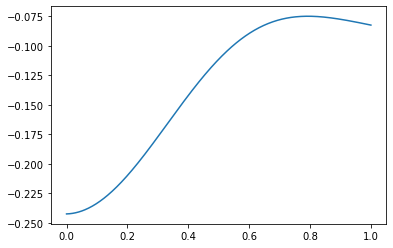

In [13]:
plt.plot(np.linspace(0,1,401),np.real(corr_t))

In [14]:
np.array(corr_t)

tensor([-0.24233172, -0.24230771, -0.24227313, -0.24222797, -0.24217226,
        -0.24210598, -0.24202917, -0.24194182, -0.24184395, -0.24173558,
        -0.24161672, -0.24148739, -0.24134762, -0.24119741, -0.2410368 ,
        -0.2408658 , -0.24068445, -0.24049277, -0.24029078, -0.24007853,
        -0.23985603, -0.23962333, -0.23938046, -0.23912745, -0.23886434,
        -0.23859117, -0.23830798, -0.23801481, -0.23771171, -0.23739871,
        -0.23707588, -0.23674324, -0.23640086, -0.23604878, -0.23568706,
        -0.23531574, -0.23493489, -0.23454455, -0.23414479, -0.23373566,
        -0.23331722, -0.23288954, -0.23245267, -0.23200669, -0.23155165,
        -0.23108762, -0.23061467, -0.23013287, -0.22964229, -0.229143  ,
        -0.22863507, -0.22811858, -0.2275936 , -0.22706021, -0.22651848,
        -0.22596849, -0.22541033, -0.22484407, -0.2242698 , -0.22368759,
        -0.22309754, -0.22249972, -0.22189423, -0.22128115, -0.22066056,
        -0.22003257, -0.21939725, -0.2187547 , -0.2